#### This simulates a classic reinforcement learning problem regarding the armed bandits: 
The following code is from the book: Deep Reinforcement Learning, and only represents my implementation and practice on it

The following shows the Q value function showing the expected rewards based on the history: \
$Q_k(a) = \frac{R_1 + R_2 + \dots + R_k}{k_a}$

We choose the best action by choosing the action which gives us the best expected reward: \
$\forall a_i \in A_k$ \
$a^* = argmax_aQ_k(a_i)$

Softmax function: 
$Pr(A) = \frac{e^{\frac{Q_k(A)}{\tau}}}{\sum\limits^n_{i=1}e^{\frac{Q_k(i)}{\tau}}}$

In [30]:
n_bandits = 10 

In [1]:
def exp_reward(action, history): 
    rewards_for_action = history[action]
    return sum(rewards_for_action) / len(rewards_for_action)

In [2]:
def get_best_action(actions, history): 
    best_action = 0 
    max_action_value = 0
    for i in range(len(actions)): 
        cur_action_value = get_action_value(actions[i])
        if cur_action_value > max_action_value: 
            best_action = i 
            max_action_value = cur_action_value 
    return best_action

In [4]:
def get_reward(prob, n=10): 
    reward = 0 
    for i in range(n): 
        if random.random() < prob: 
            reward += 1 
    return reward 

In [6]:
import numpy as np 
from scipy import stats 
import random
import matplotlib.pyplot as plt

n = 10 
probs = np.random.rand(n)
eps = 0.2

plot reward function

(array([  0.,   3.,  24.,  60., 208., 379., 568., 458., 237.,  63.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

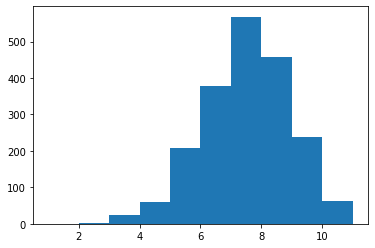

In [29]:
prob = 0.7
n_samples = 2000
rewards = [get_reward(0.7) for _ in range(n_samples)]
plt.hist(rewards, bins=[i for i in range(1,12)])

More efficient way to compute the running average: 

$\mu_{new} = \frac{k\dot\mu_{old} + x}{k+1}$

In [32]:
record = np.zeros((n_bandits,2))
record

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [33]:
def update_record(record, action, r): 
    new_r = (record[action, 0] * record[action,1] + r) / (record[action, 0] + 1)
    record[action, 0] += 1 
    record[action, 1] = new_r 
    return record 

In [34]:
def get_best_arm(record): 
    arm_index = np.argmax(record[:,1], axis=0)
    return arm_index 

[0.93967717 0.48650231 0.84195036 0.37998283 0.60505369 0.1134344
 0.74692935 0.39566011 0.32196024 0.28562419]


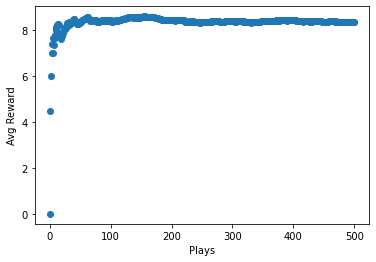

In [53]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
record = np.zeros((n_bandits, 2))
probs = np.random.rand(n_bandits)
print(probs)
eps = 0.2 
rewards = [0]
for i in range(500): 
    if random.random() > eps: 
        choice = get_best_arm(record)
    else: 
        choice = np.random.randint(n_bandits)
    r = get_reward(probs[choice])
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)), rewards)
    

In [54]:
def softmax(vals, tau=1.12): 
    softm = np.exp(vals/tau)/np.sum(np.exp(vals/tau)) 
    return softm
    

In [60]:
x = np.array([0,1,2,3,4,5,6])
softmax(x)

array([0.00278929, 0.00681171, 0.01663486, 0.04062393, 0.09920759,
       0.24227458, 0.59165804])

[0.26983622 0.37025644 0.32846379 0.92833236 0.69319909 0.22270509
 0.34034794 0.59882869 0.0240582  0.74525476]


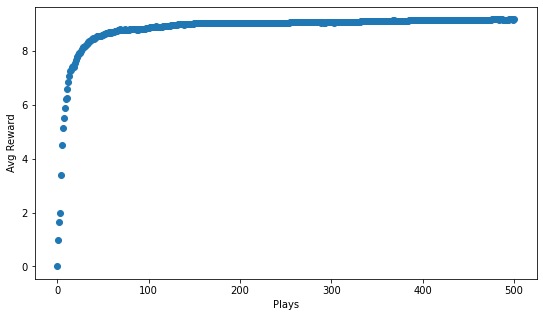

In [68]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
probs = np.random.rand(n_bandits)
print(probs)
record = np.zeros((n_bandits, 2))
rewards = [0]
for i in range(500): 
    p = softmax(record[:,1])
    choice = np.random.choice(np.arange(n_bandits),p=p)
    r = get_reward(probs[choice], n_bandits)
    record = update_record(record, choice, r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)), rewards)

### Contextual bandits

In [83]:
class ContextBandit: 
    def __init__(self, arms=10): 
        self.arms = arms 
        self.init_distribution(arms)
        self.update_state() 

    def init_distribution(self, arms): 
        self.bandit_matrix = np.random.rand(arms, arms)
    
    def reward(self, prob): 
        reward = 0 
        for i in range(self.arms): 
            if random.random() < prob: 
                reward += 1 
        return reward
    
    def get_state(self): 
        return self.state 
    
    def update_state(self): 
        self.state = np.random.randint(0, self.arms)
        
    def get_reward(self, arm): 
        return self.reward(self.bandit_matrix[self.get_state()][arm])
    
    def choose_arm(self, arm): 
        reward = self.get_reward(arm)
        self.update_state()
        return reward 

In [89]:
env = ContextBandit(arms=10)
state = env.get_state()
print(state)

9


In [90]:
import numpy as np 
import torch 

arms = 10 
N, D_in, H, D_out = 1, arms, 100, arms 

In [91]:
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H), 
    torch.nn.ReLU(), 
    torch.nn.Linear(H, D_out), 
    torch.nn.ReLU(),
)

loss_fn = torch.nn.MSELoss() 
env = ContextBandit(arms)

def one_hot(N, pos, val=1): 
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val 
    return one_hot_vec 

In [133]:
def train(env, epochs=5000, learning_rate=1e-2): 
    cur_state = torch.Tensor(one_hot(arms, env.get_state()))
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    rewards=[]
    for i in range(epochs): 
        y_pred = model(cur_state)
        softm = softmax(y_pred.data.numpy(), tau=2.0)
        softm /= softm.sum()
        choice = np.random.choice(arms, p = softm)
        cur_reward = env.choose_arm(choice)
        one_hot_reward = y_pred.data.numpy().copy() 
        one_hot_reward[choice] = cur_reward
        reward = torch.Tensor(one_hot_reward)
        rewards.append(cur_reward)
        loss = loss_fn(y_pred, reward)
        optimizer.zero_grad()
        loss.backward() 
        optimizer.step() 
        cur_state = torch.Tensor(one_hot(arms, env.get_state()))
    return np.array(rewards)

In [139]:
rewards = train(env)

In [140]:
mean_rewards = []
for i, r in enumerate(rewards):
    if i == 0: 
        mean_rewards.append(r)
    else: 
        mean_rewards.append((i*mean_rewards[-1] + r)/(i+1))

In [141]:
rewards

array([ 5,  8, 10, ...,  9,  8, 10])

In [142]:
print(len(mean_rewards))

5000


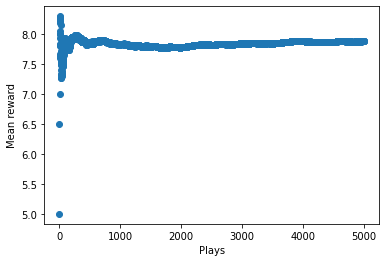

In [143]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Mean reward")

plt.scatter([i for i in range(5000)],mean_rewards)